In [45]:
# Loading all the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from xgboost import  XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [46]:
#Loading the dataframe 

forrest=pd.read_csv('train.csv')

In [47]:
# Sneak Peek of the dataframe

forrest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [48]:
#dropping the Id since it is a dimension 

forrest.drop('Id',inplace=True,axis=1)

In [49]:
forrest.shape

(15120, 55)

There are 15,120 rows of data and 54 features and one label.

In [50]:
forrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_Type1                            15120 non-null int64
Soil_T

We can see that there is no null items in the given data set.

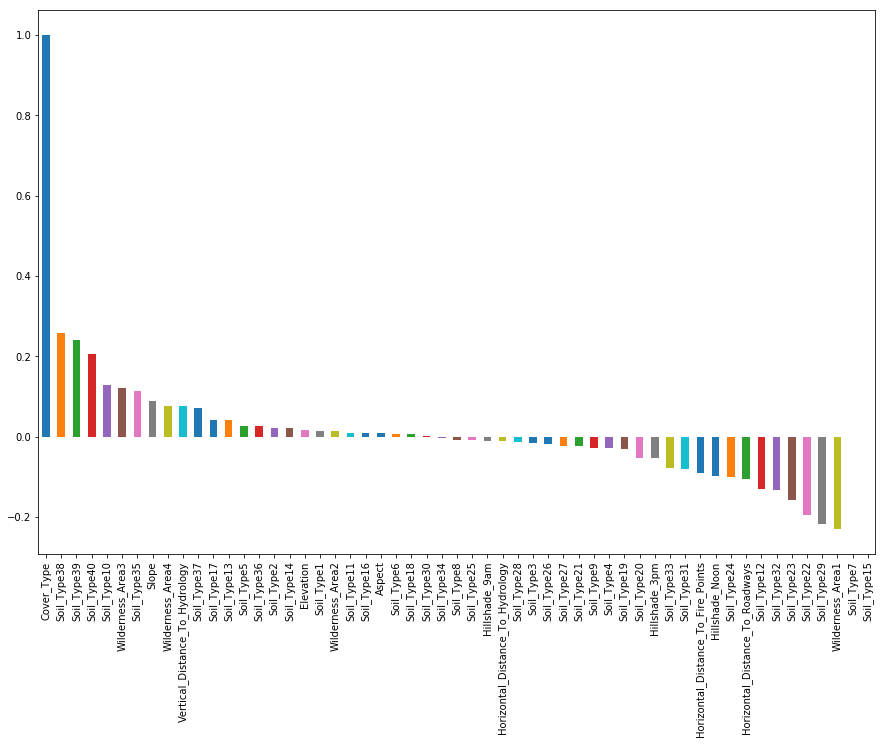

In [51]:
plt.figure(figsize=(15,10))
forrest.corr()['Cover_Type'].sort_values(ascending=False).plot.bar()

Soil_Type38,Soil_Type39,Wilderness_Area1,Soil_Type29 are strongly correlated to the target variable.

We can also see that Soil_Type15 and Soil_Type7 have no correlation with the target variable so we can remove these two features.

In [52]:
forrest.drop(['Soil_Type15','Soil_Type7'],axis=1,inplace=True)

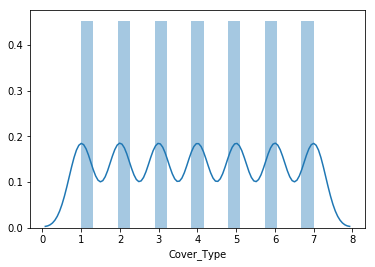

In [53]:
sns.distplot(forrest['Cover_Type'])

We can see that all the cover type as equal in number.

We can verify that.

In [54]:
forrest.Cover_Type.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [55]:
forrest_test=pd.read_csv('test.csv')

id=forrest_test['Id']

forrest_test.drop('Id',inplace=True,axis=1)


In [56]:
forrest_test.drop(['Soil_Type15','Soil_Type7'],axis=1,inplace=True)

In [57]:
forrest_test.shape

(565892, 52)

Clearly test data is 37 times larger than the train data. 

So while building the model we are not going to split the train data as train and validation. 

And for higher processing speed and for better results XGBoost is used. 

# Building the algorithm

In [58]:
# Splitting features and Lable
x = forrest.drop('Cover_Type',axis=1)
y = forrest['Cover_Type']

In [59]:
scaler=StandardScaler().fit(x)
scaledx=scaler.transform(x)

In [60]:
model=XGBClassifier(n_estimators=2000)
model.fit(scaledx,y)
model.score(scaledx,y)

0.9904761904761905

In [61]:
scaledtest=scaler.transform(forrest_test)

predict=model.predict(scaledtest)

submission=pd.DataFrame(index=id)
submission['Cover_Type']=predict

submission.to_csv('submission_xgboost2k.csv')

After uploading the test in kaggle got an accuracy of 72.46